# Subtask 1: Explorattory Data Analysis

### Import packages and Datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
client_df=pd.read_csv('client_data.csv')
price_df=pd.read_csv('price_data.csv')

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## Descriptive statistics of data

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
#We need to convert the datetime related columns into datetime data types later

### Lets look at some clients and price statistics for now

In [8]:
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [140]:
client_df.skew(numeric_only=True)

cons_12m                           5.997308
cons_gas_12m                       9.597530
cons_last_month                    6.391407
forecast_cons_12m                  7.155853
forecast_cons_year                16.587990
forecast_discount_energy           5.155098
forecast_meter_rent_12m            1.505148
forecast_price_energy_off_peak    -0.119586
forecast_price_energy_peak        -0.014331
forecast_price_pow_off_peak       -4.998772
imp_cons                          13.198799
margin_gross_pow_ele               4.472632
margin_net_pow_ele                 4.473326
nb_prod_act                        8.636878
net_margin                        36.569515
num_years_antig                    1.446214
pow_max                            5.786785
churn                              2.720715
dtype: float64

#### This shows the distribution is highly skewed

In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


The average price of energy for the 1st period was: $0.14
The average price of energy for the 2nd period was: $0.05
The average price of energy for the 3rd period was: $0.03
The average price of energy was declining in the last year.

The average power of power for the 1st period was: $43.33
The average power of power for the 2nd period was: $10.62
The average power of power for the 3rd period was: $6.40
The average price of power was declining in the last year.

### Creating a new dataset to see the customer churn info

In [10]:
churn_df=client_df[['id','churn']]

In [11]:
churn_df.head(3)

,id,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1
1,d29c2c54acc38ff3c0614d0a653813dd,0
2,764c75f661154dac3a6c254cd082ea7d,0


In [12]:
churn_df=churn_df.replace({0:'Stayed',1:'Churned'})

In [13]:
churn_df.head(3)

,id,churn
0,24011ae4ebbe3035111d65fa7c15bc57,Churned
1,d29c2c54acc38ff3c0614d0a653813dd,Stayed
2,764c75f661154dac3a6c254cd082ea7d,Stayed


In [14]:
churn_df.to_csv('churn_data.csv')

### Checking what % of customers churned in the last 3 months

In [15]:
churn_df['churn'].value_counts()

Stayed     13187
Churned     1419
Name: churn, dtype: int64

### So 1419 customers churned in the last 3 months

In [16]:
churn_df['churn'].value_counts()/churn_df.shape[0]*100

Stayed     90.284814
Churned     9.715186
Name: churn, dtype: float64

In the past 3 months :
90% of customer retention, 
10% of customer churn

# Subtask 2:Data Visualization

### Visualizing the churning status

In [130]:
def plot_stacked_bars(dataframe, title_, size_=(15, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

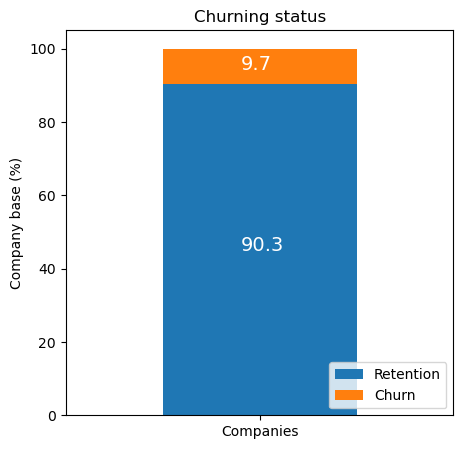

In [131]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

### About 10% of customers churned over the last 3 months, sounds about right from previous calculations

## Sales Channel and churning relationship

In [132]:
channel=client_df[['id','channel_sales','churn']]
channel=channel.groupby([channel['channel_sales'],channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


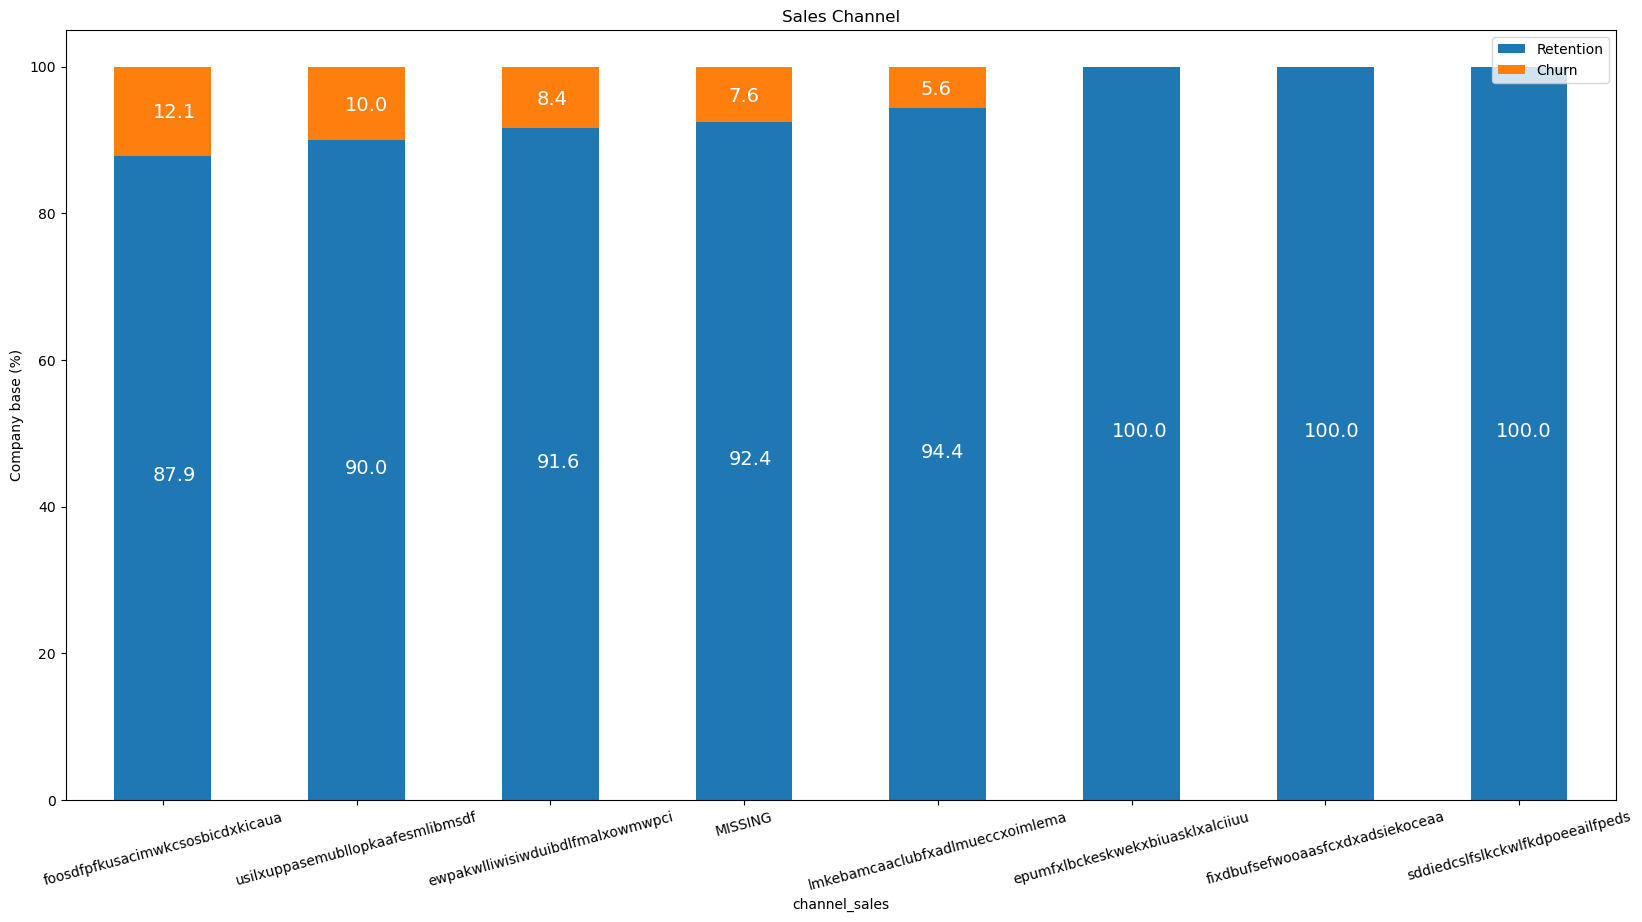

In [135]:
plot_stacked_bars(channel_churn,'Sales Channel',(20,10), rot_=15)

Interestingly, the churning customers are distributed over 5 different values of 'sales_channel', as well as the value of 'MISSING' has a churn rate of 7.6%
Missing indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

### Consumption

Lets check the consumption in the last year and month. Since the consumption data is univarient, lets use histogram to visualize their distribution

In [141]:
client_df.head(2)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0


In [145]:
consumption=client_df[['id','cons_12m','cons_gas_12m','cons_last_month','imp_cons','has_gas','churn']]
consumption.head(3)

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.0,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.0,f,0


In [146]:
def plot_distribution(dataframe,column,ax,bins_=50):
    temp=pd.DataFrame({'Retention':dataframe[dataframe['churn']==0][column],
                      'Churn':dataframe[dataframe['churn']==1][column]})
    temp[['Retention','Churn']].plot(kind='hist',bins=bins_,ax=ax,stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain',axis='x')

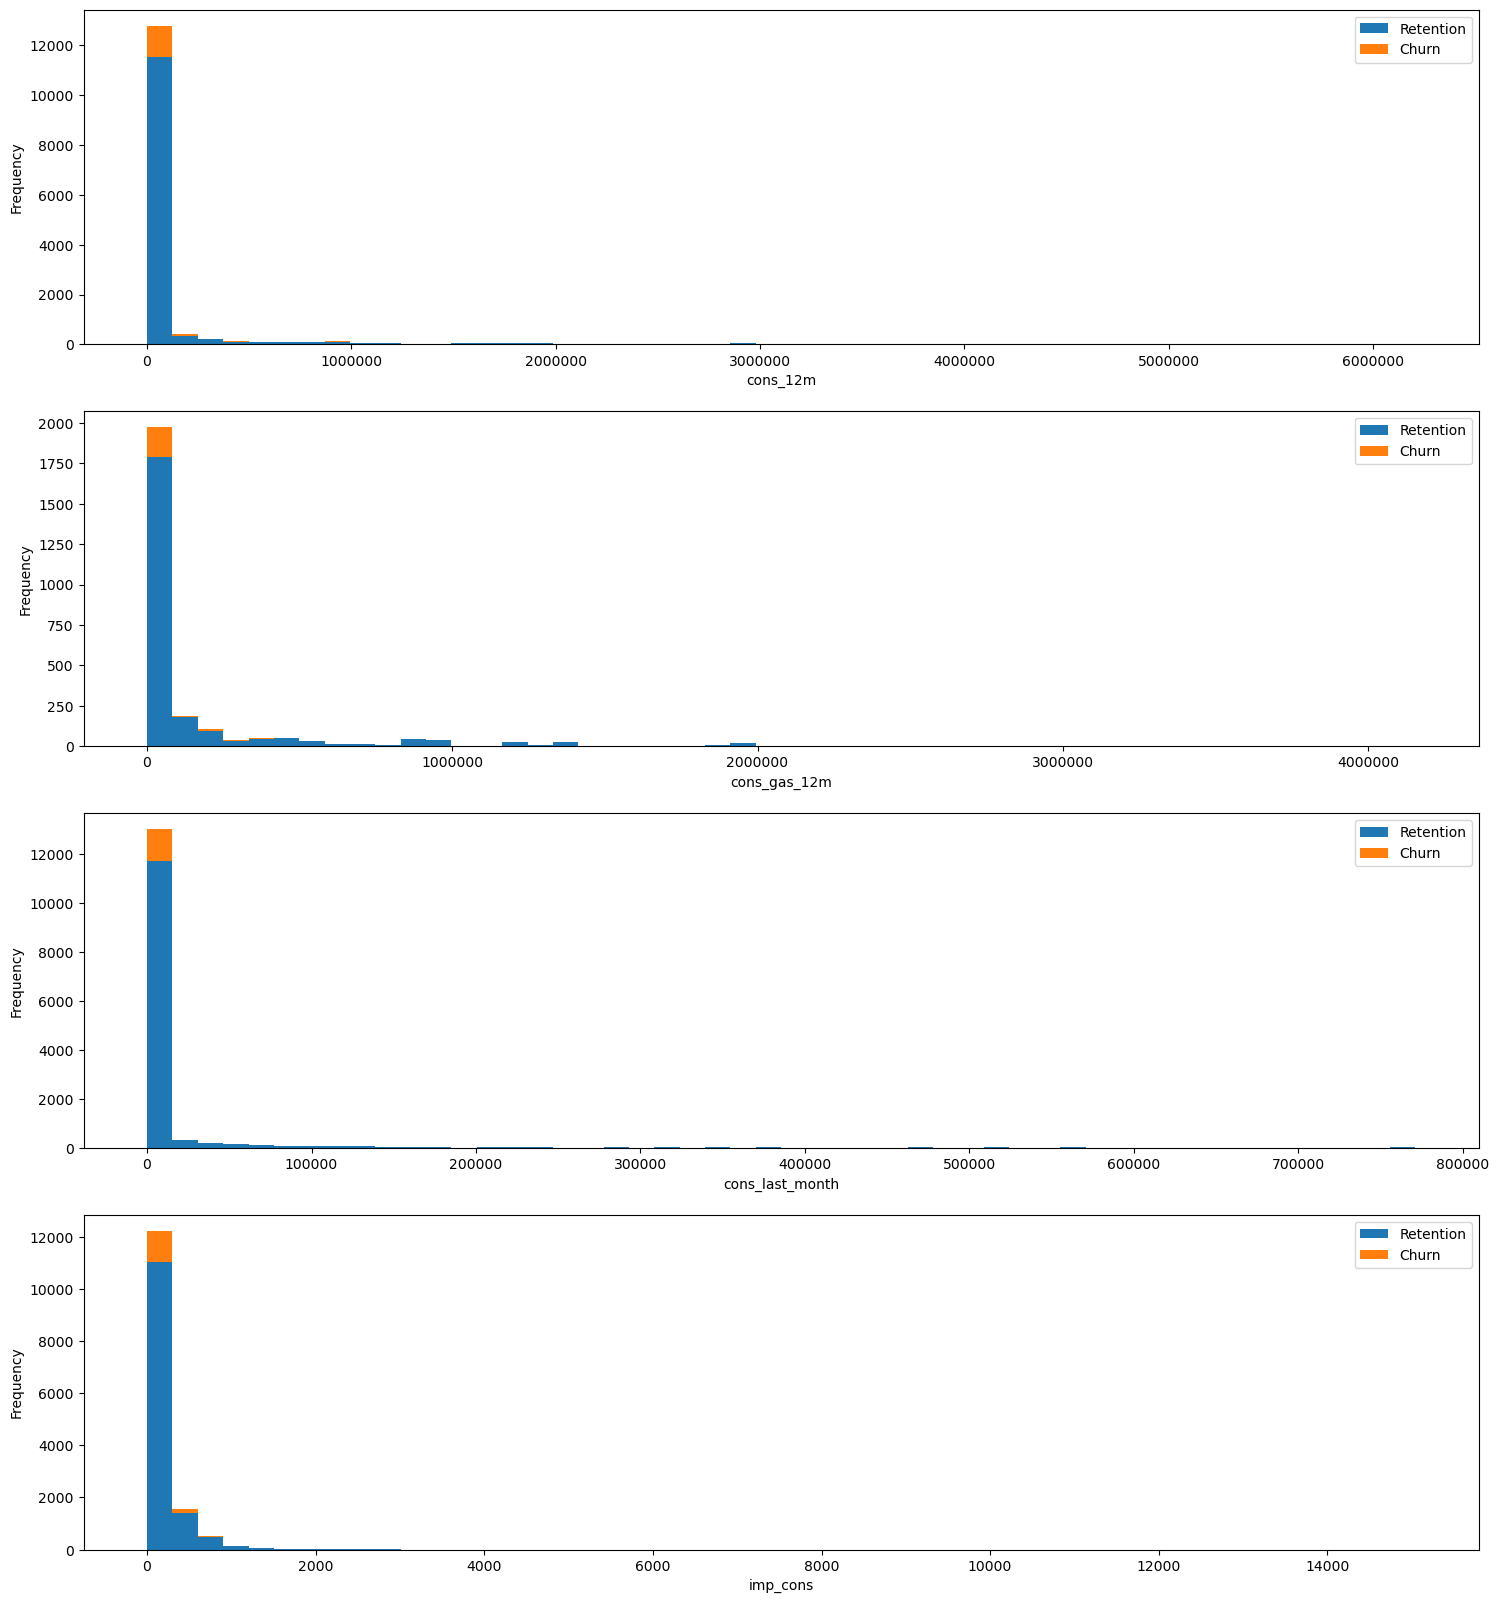

In [150]:
fig, axs=plt.subplots(nrows=4, figsize=(18,20))
plot_distribution(consumption,'cons_12m',axs[0])
plot_distribution(consumption[consumption['has_gas']=='t'],'cons_gas_12m',axs[1])
plot_distribution(consumption,'cons_last_month',axs[2])
plot_distribution(consumption,'imp_cons',axs[3])

### Looks like there's some possible outliers, Lets visualize the outliers

C:\Users\sudee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudee\anaconda3\lib\si

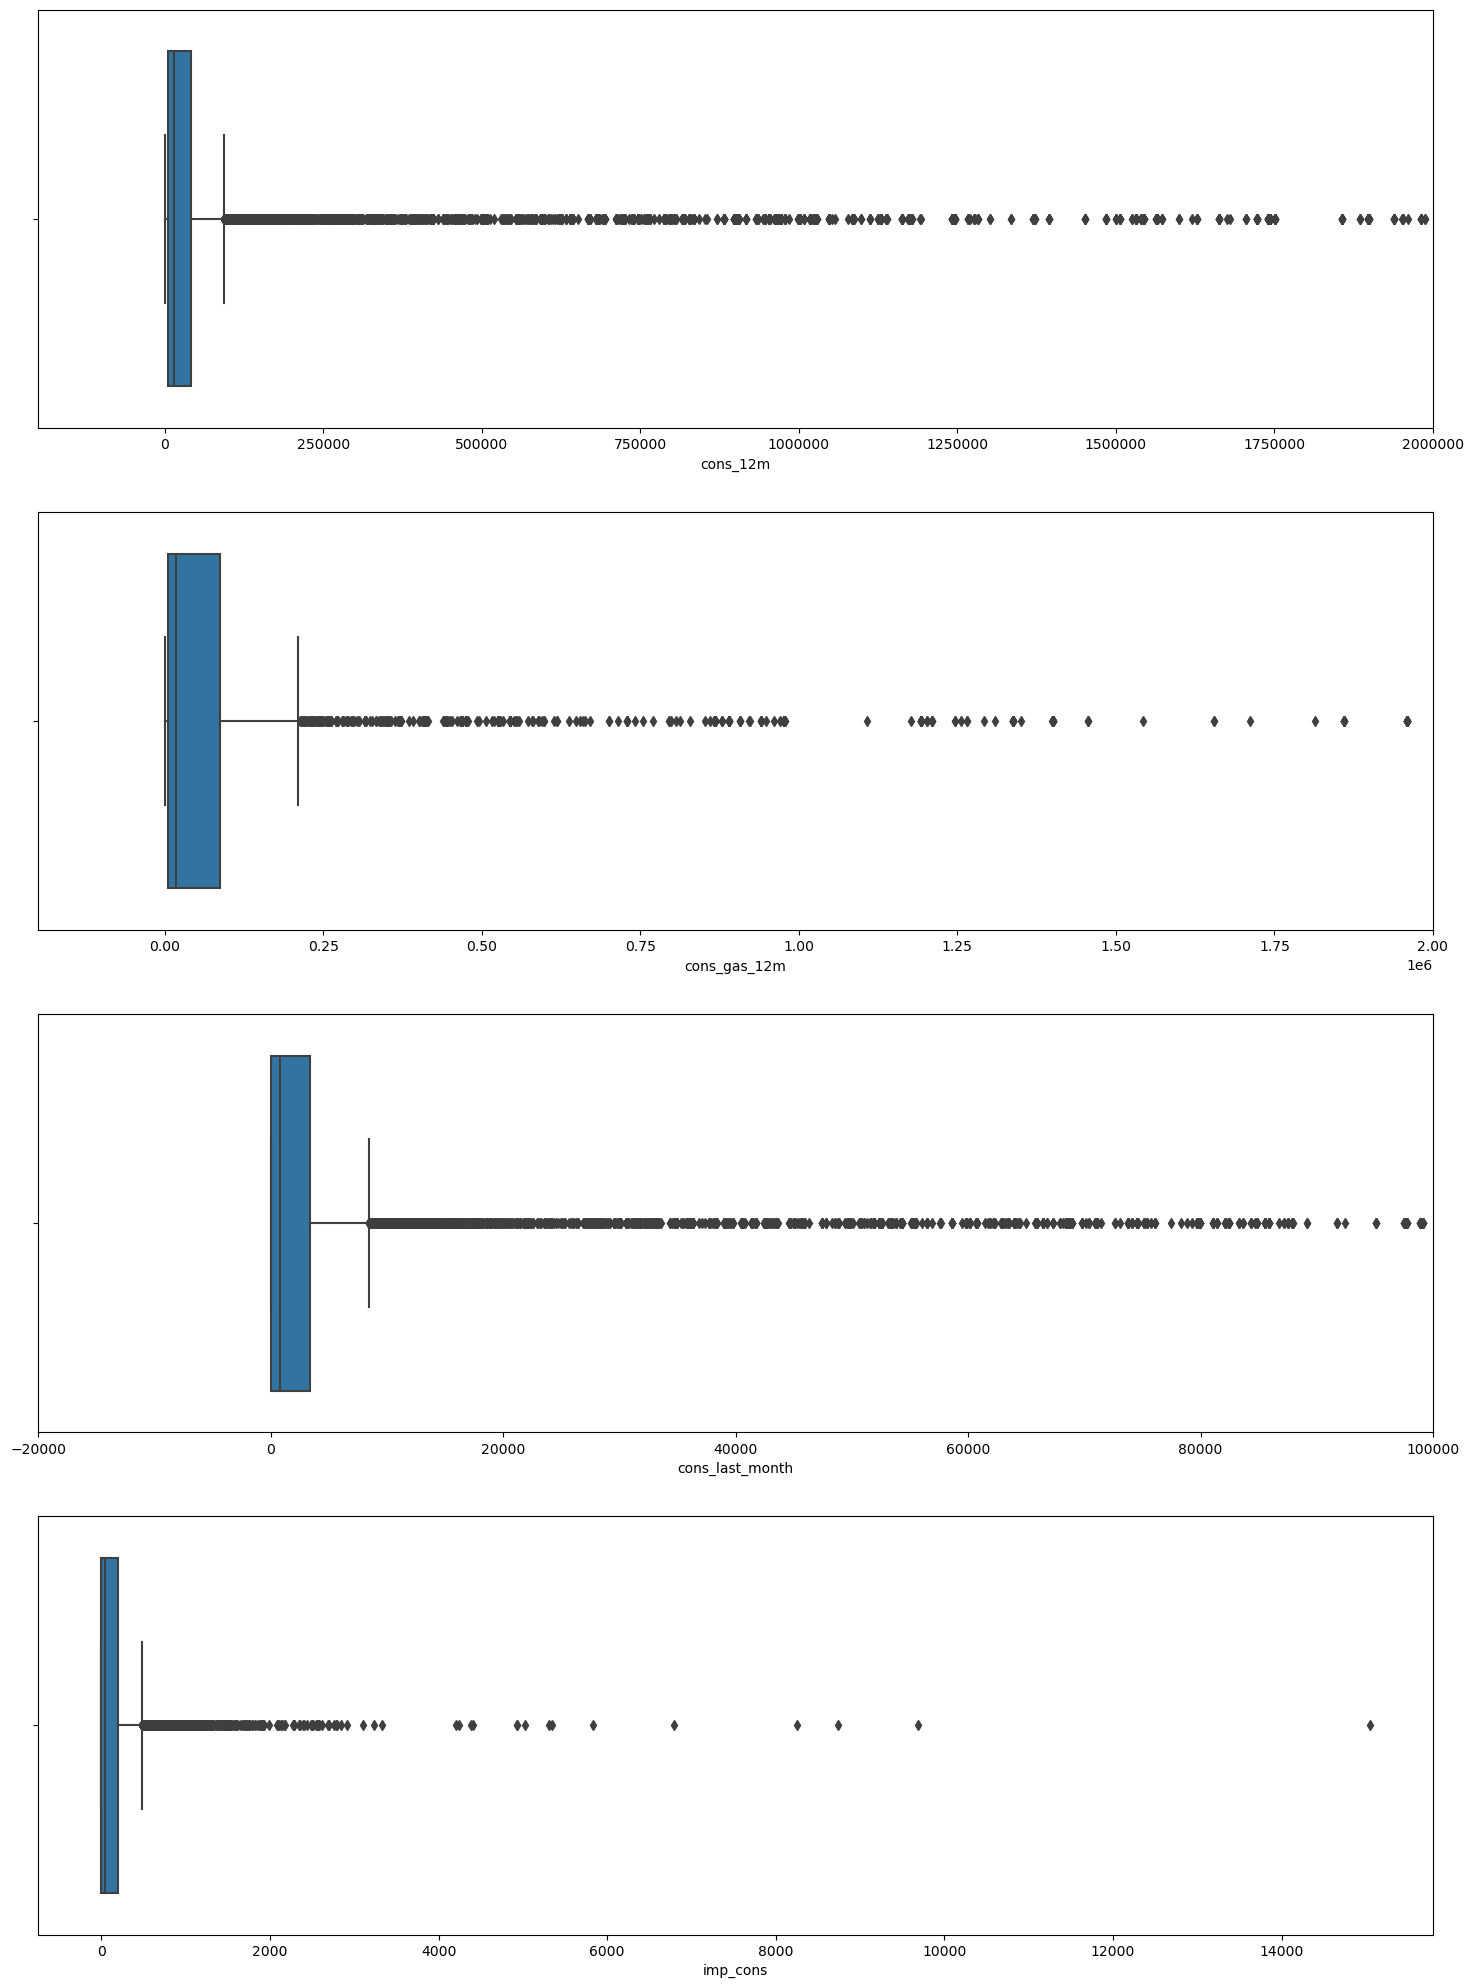

In [177]:
fig, axs=plt.subplots(nrows=4, figsize=(18,25))

sns.boxplot(consumption['cons_12m'], ax=axs[0])
sns.boxplot(consumption[consumption['has_gas']=='t']['cons_gas_12m'], ax=axs[1])
sns.boxplot(consumption['cons_last_month'], ax=axs[2])
sns.boxplot(consumption['imp_cons'], ax=axs[3])

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

#### We'll try and deal with skewness and outliers later.

## Forecast

In [183]:
forecast = client_df[['id','forecast_cons_12m','forecast_cons_year',
                     'forecast_discount_energy','forecast_meter_rent_12m',
                     'forecast_price_energy_off_peak','forecast_price_energy_peak',
                     'forecast_price_pow_off_peak','churn']]
forecast.head(2)

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0


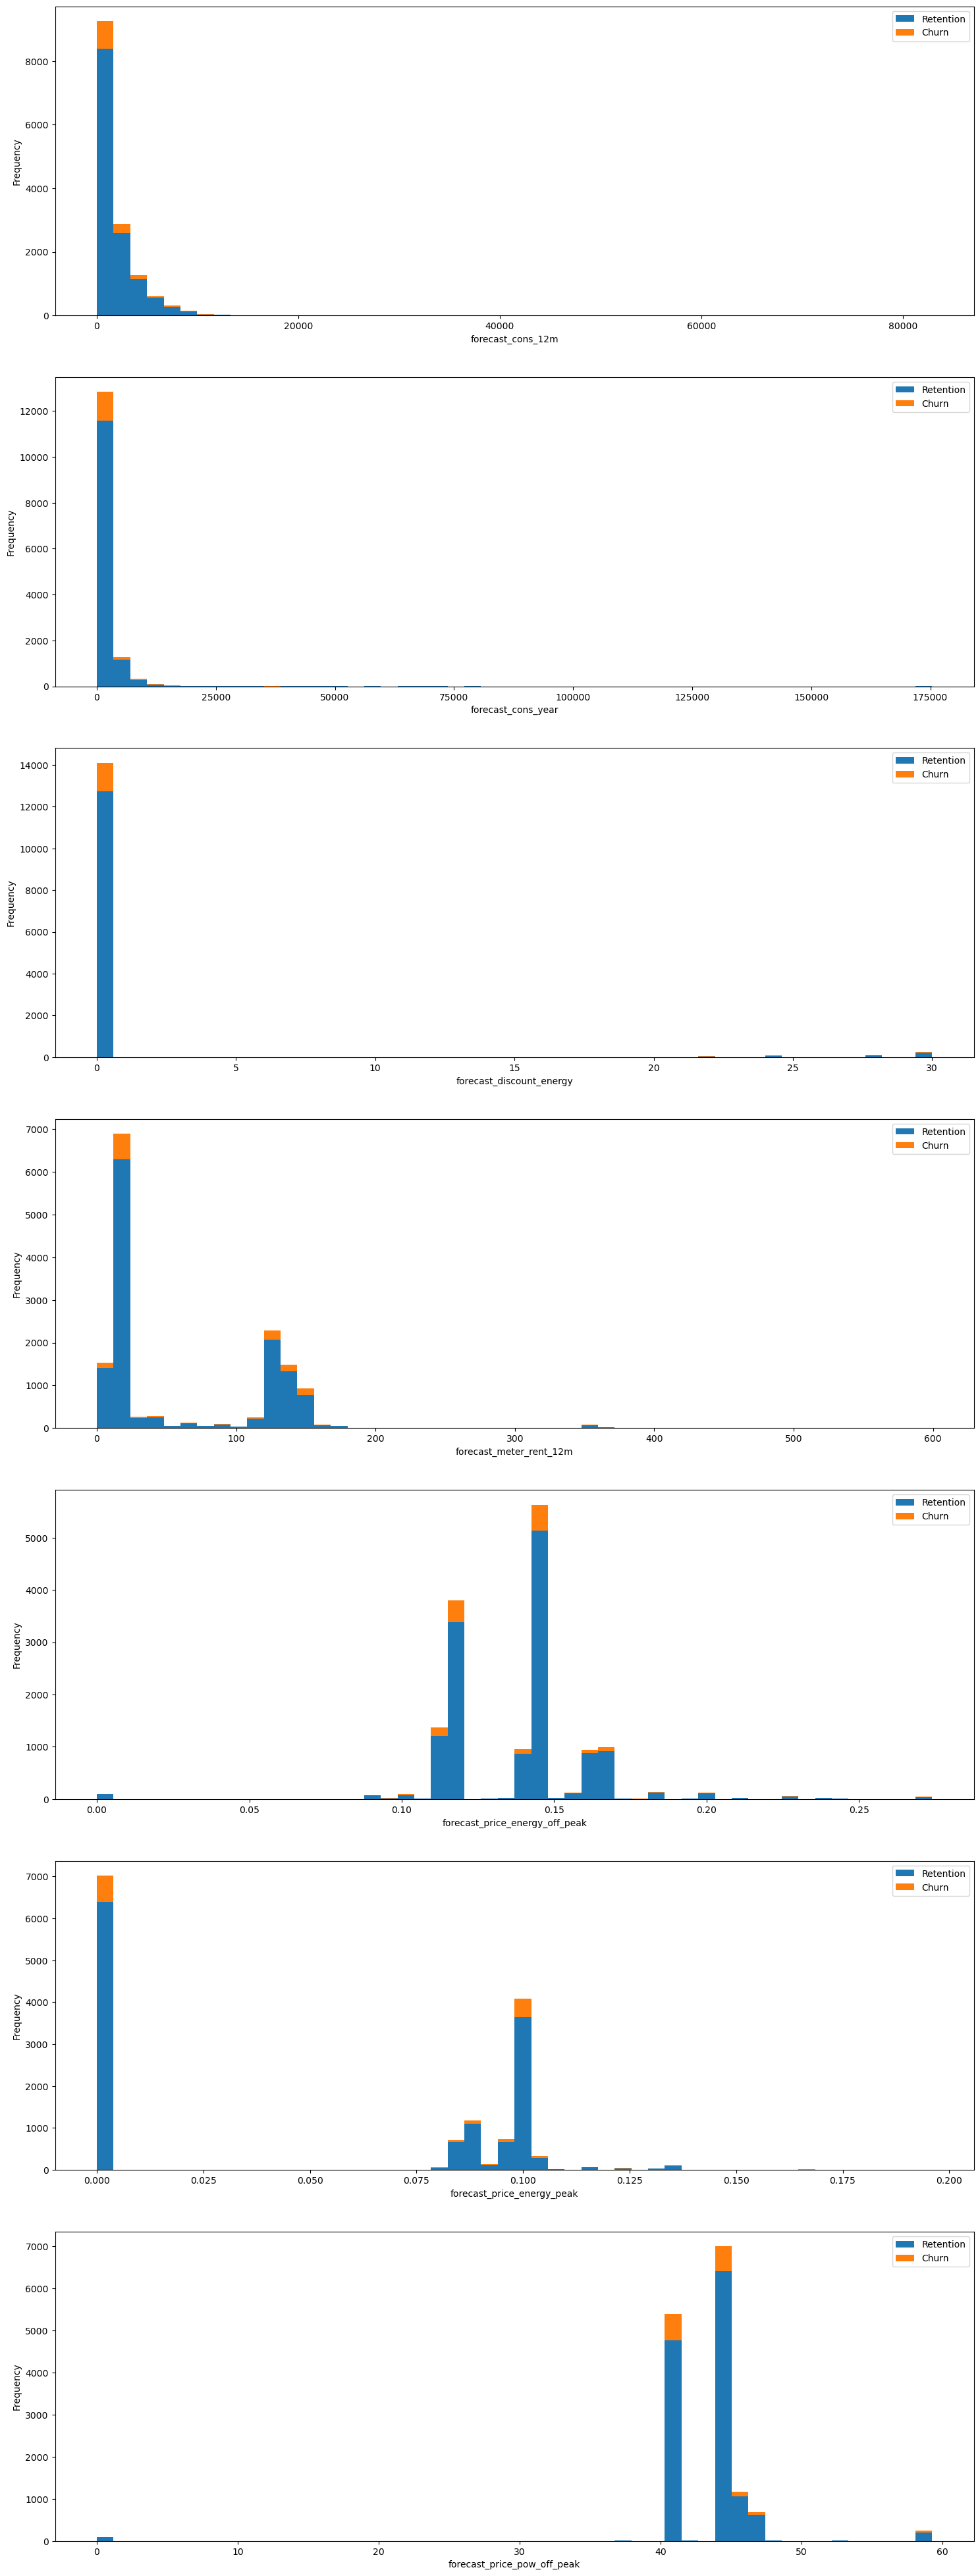

In [187]:
fig,axs=plt.subplots(nrows=7,figsize=(18,50))
plot_distribution(client_df,'forecast_cons_12m',axs[0])
plot_distribution(client_df,'forecast_cons_year',axs[1])
plot_distribution(client_df,'forecast_discount_energy',axs[2])
plot_distribution(client_df,'forecast_meter_rent_12m',axs[3])
plot_distribution(client_df,'forecast_price_energy_off_peak',axs[4])
plot_distribution(client_df,'forecast_price_energy_peak',axs[5])
plot_distribution(client_df,'forecast_price_pow_off_peak',axs[6])

#### Similar to the consumption plots, we can observe forecast plot is also highly positively skewed, we will make some transformation later to correct these skewness

## Contract type

In [196]:
contract_type=client_df[['id','has_gas','churn']]
contract=contract_type.groupby([contract_type['churn'],contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage=(contract.div(contract.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

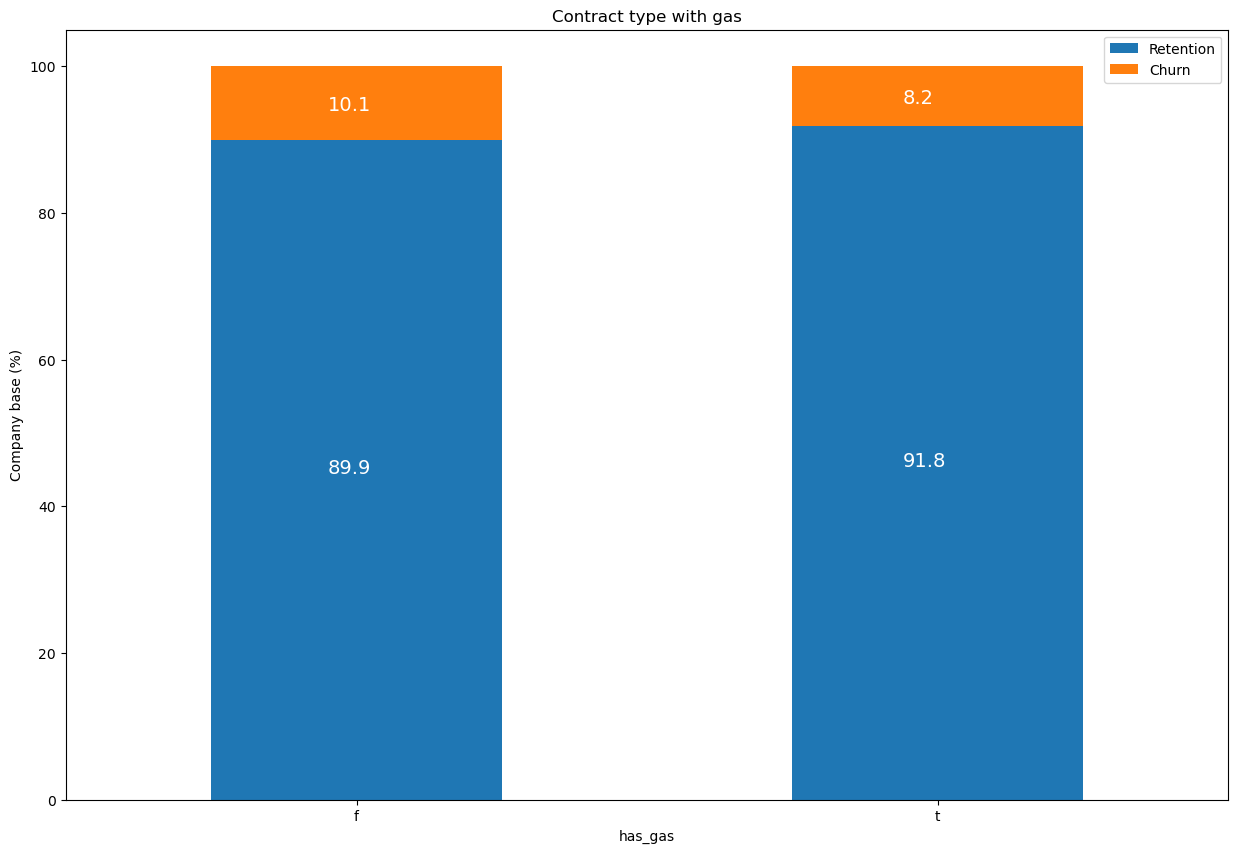

In [197]:
plot_stacked_bars(contract_percentage,'Contract type with gas')

## Margins

In [198]:
margin=client_df[['id','margin_gross_pow_ele','margin_net_pow_ele','net_margin']]
margin.head(2)

,id,margin_gross_pow_ele,margin_net_pow_ele,net_margin
0,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99
1,d29c2c54acc38ff3c0614d0a653813dd,16.38,16.38,18.89


C:\Users\sudee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


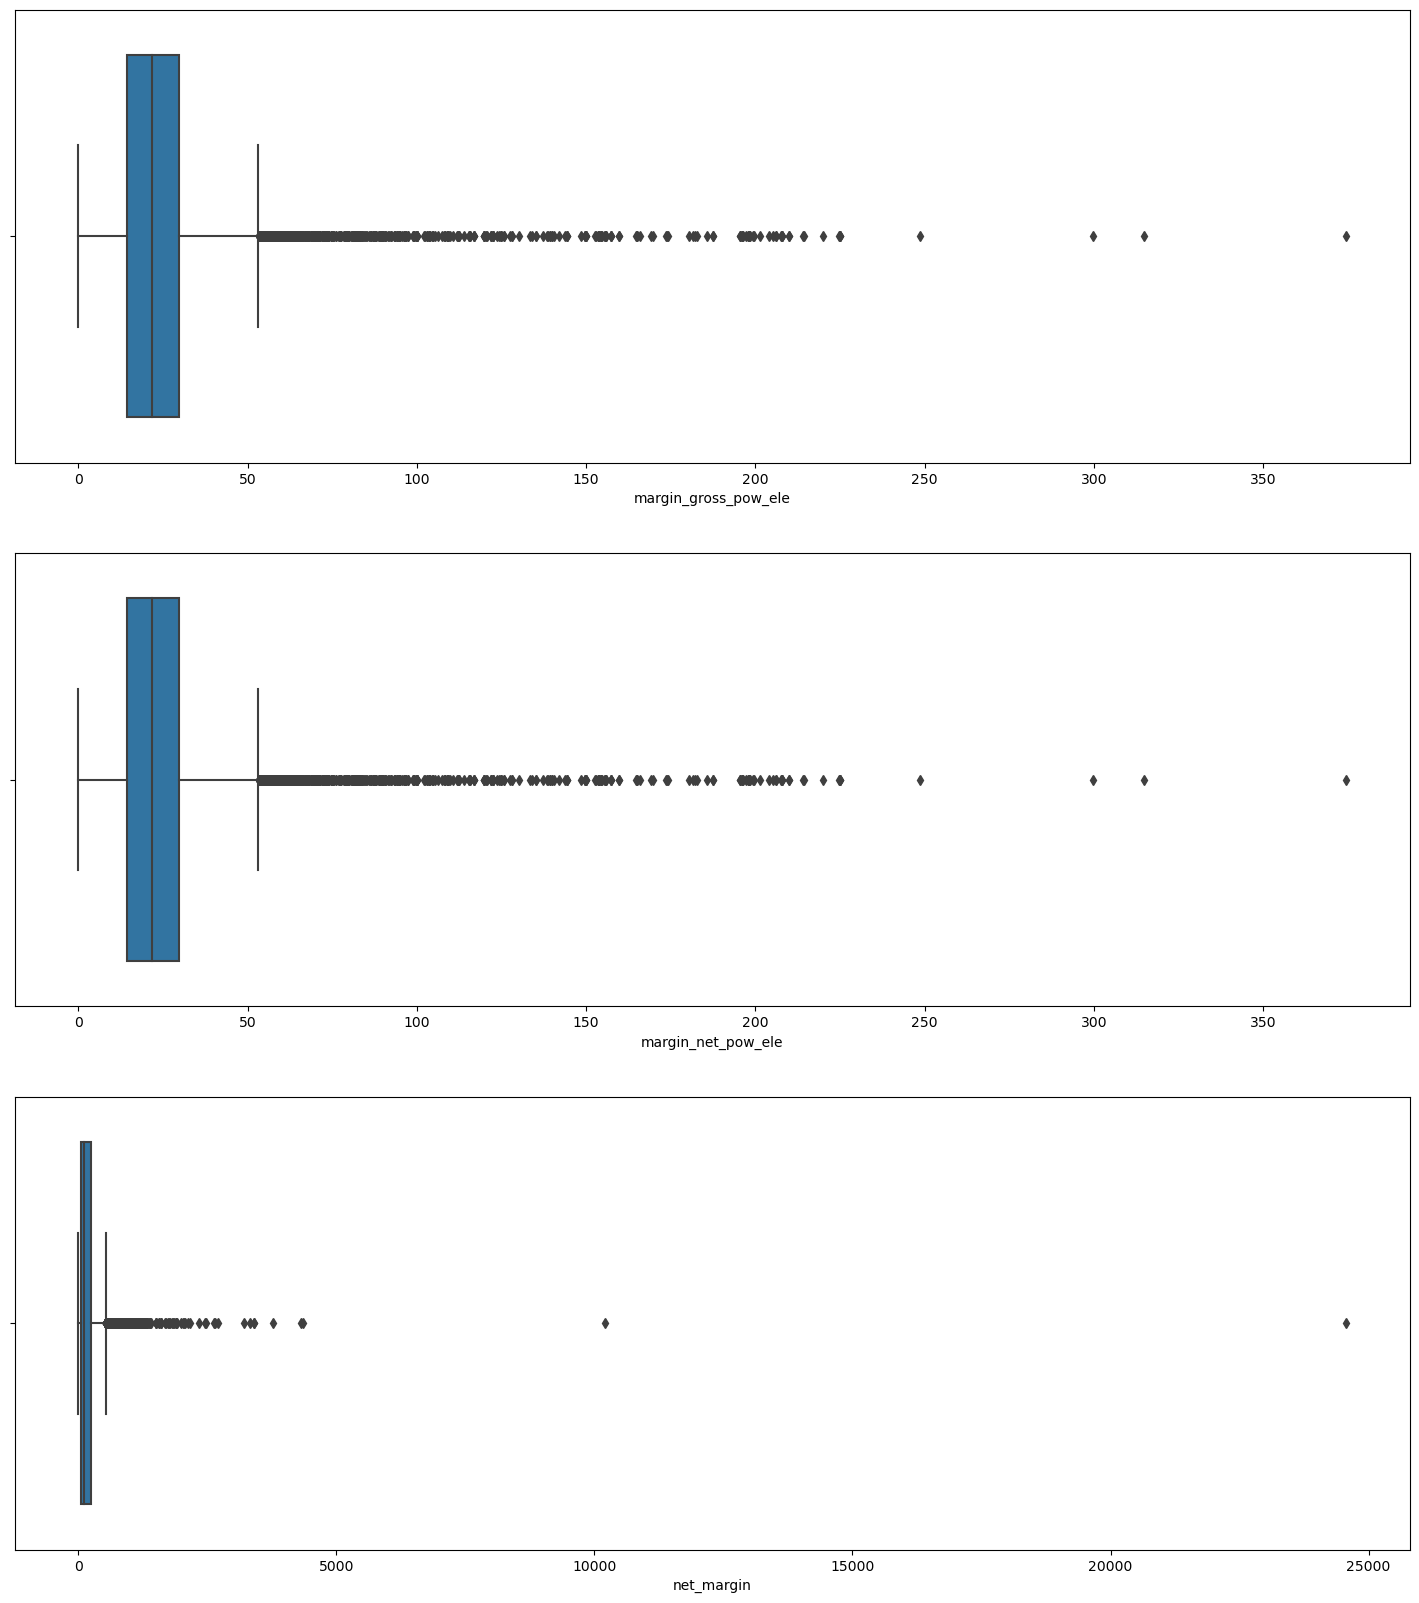

In [201]:
fig, axs=plt.subplots(nrows=3,figsize=(18,20))
sns.boxplot(margin['margin_gross_pow_ele'],ax=axs[0])
sns.boxplot(margin['margin_net_pow_ele'],ax=axs[1])
sns.boxplot(margin['net_margin'],ax=axs[2])

axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

### We have some outliers in Margin as well, we can deal with all the outliers later

## Subscribed Power

In [202]:
power=client_df[['id','pow_max','churn']]
power.head(2)

,id,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,13.800,0


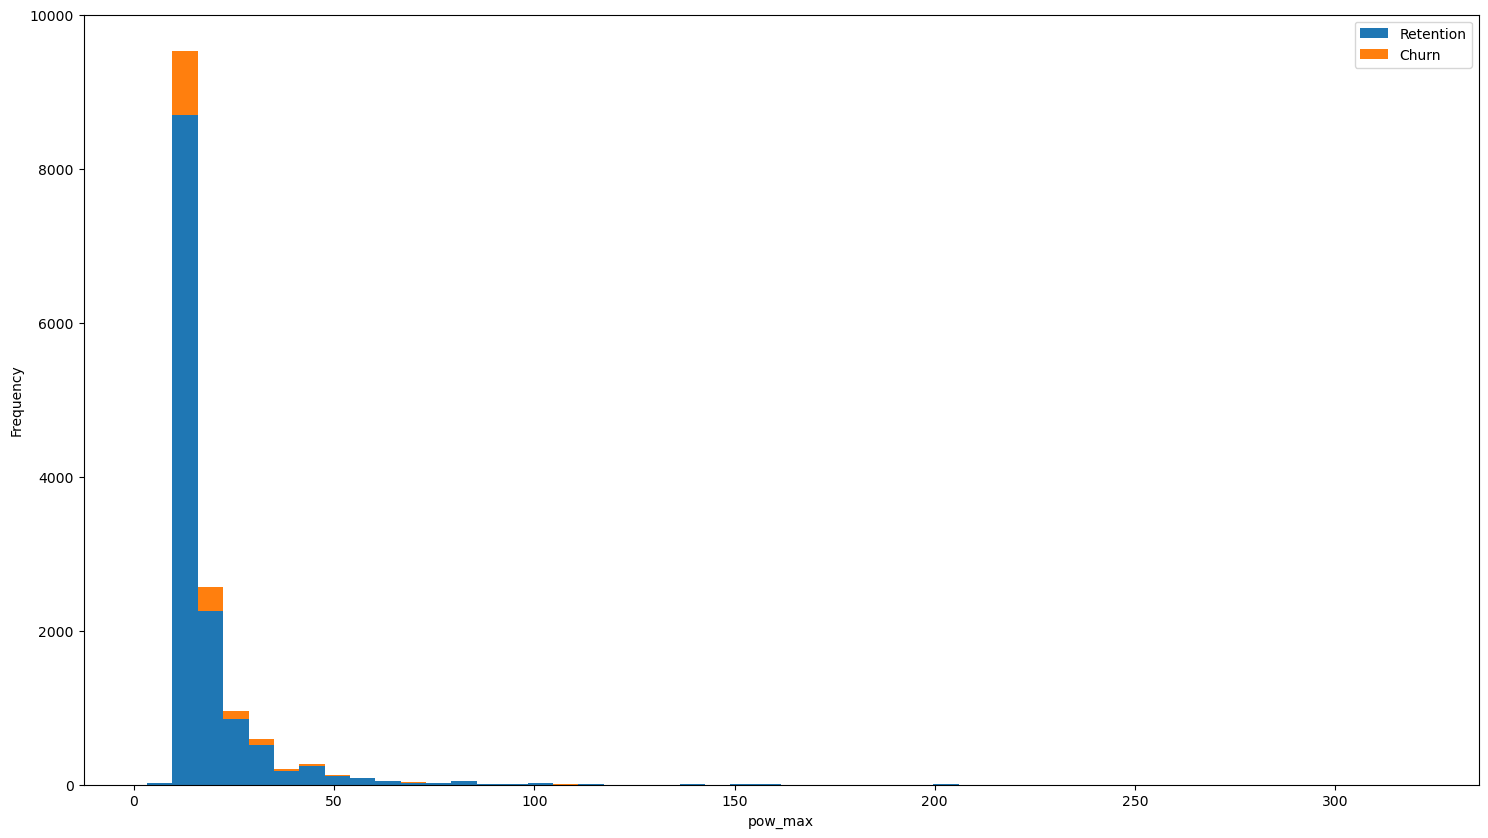

In [203]:
fig, axs=plt.subplots(nrows=1,figsize=(18,10))
plot_distribution(power,'pow_max',axs)

### Other Columns

In [204]:
others=client_df[['id','nb_prod_act','num_years_antig','origin_up','churn']]
products=others.groupby([others['nb_prod_act'],others['churn']])['id'].count().unstack(level=1)
product_percentage=(products.div(products.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

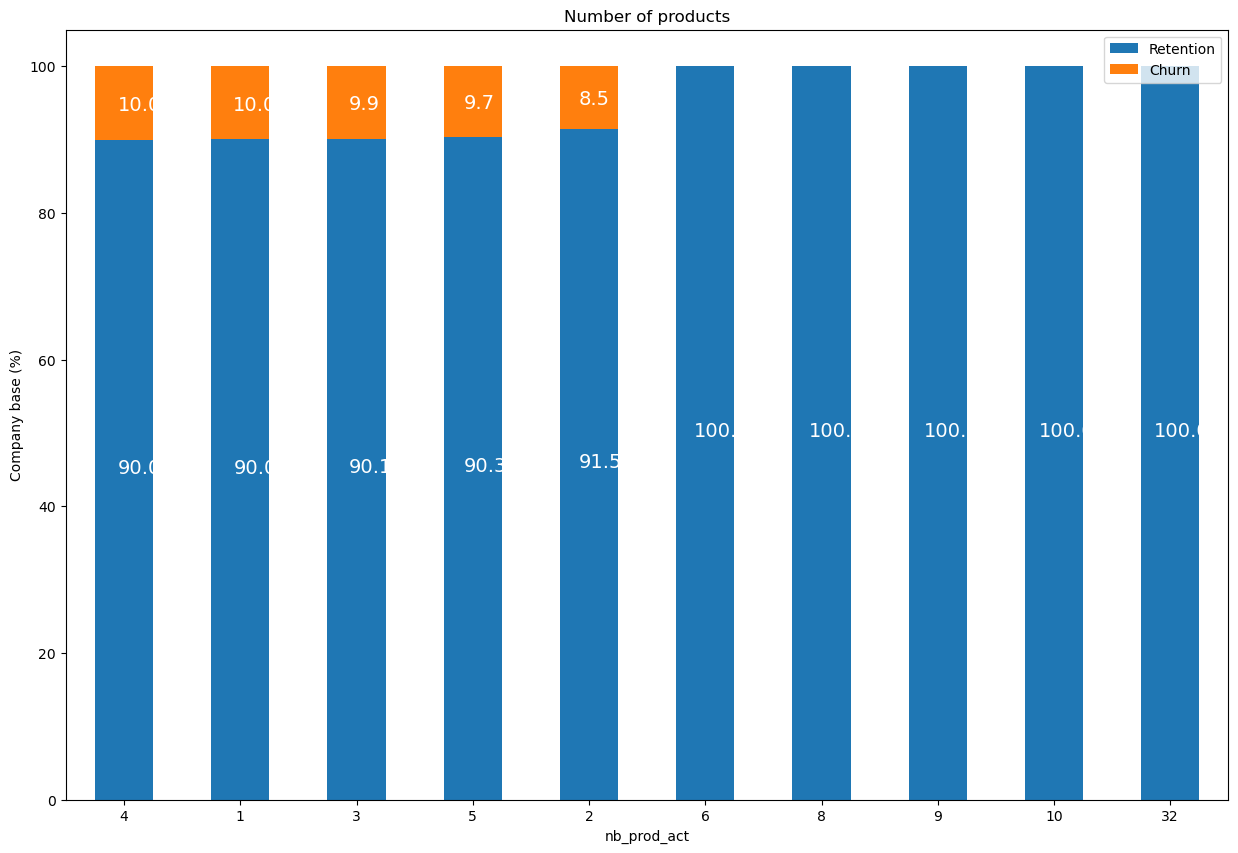

In [205]:
plot_stacked_bars(product_percentage,'Number of products')

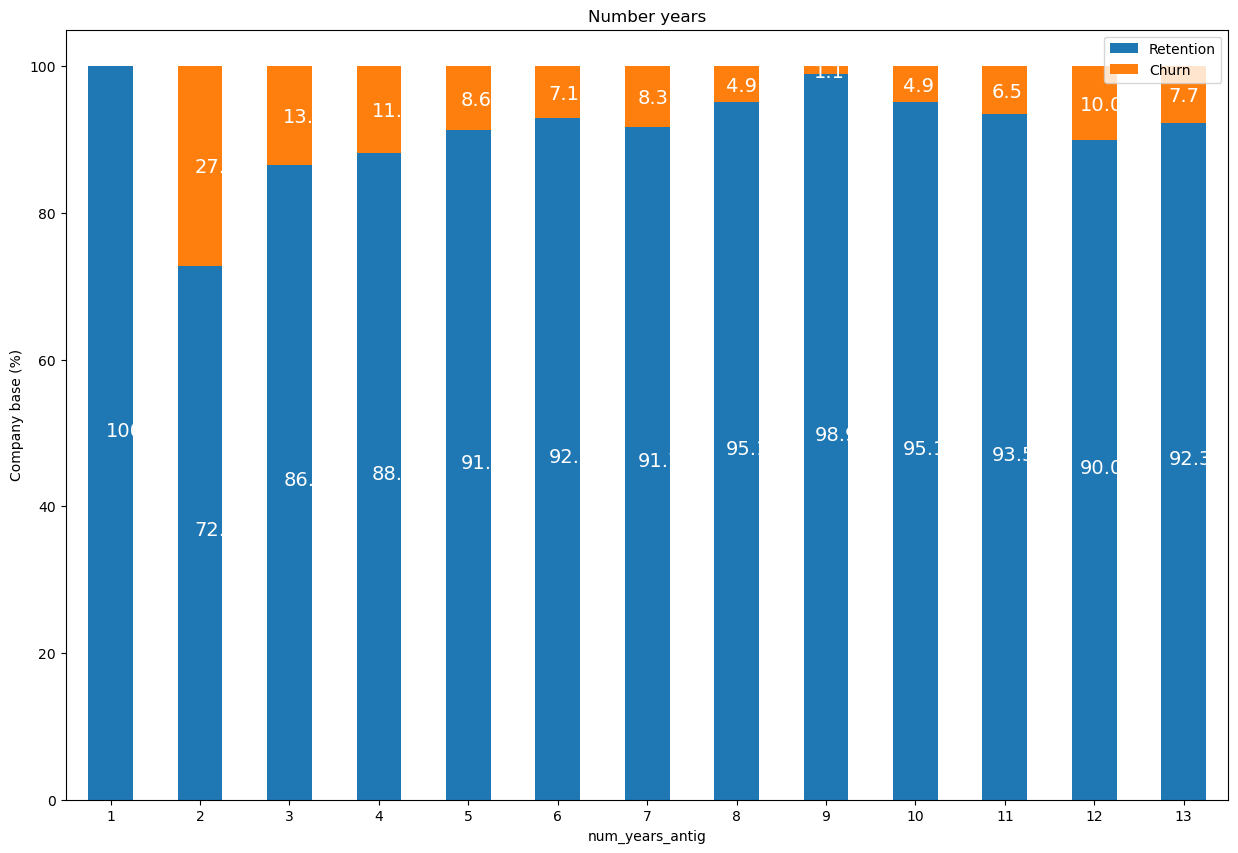

In [206]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

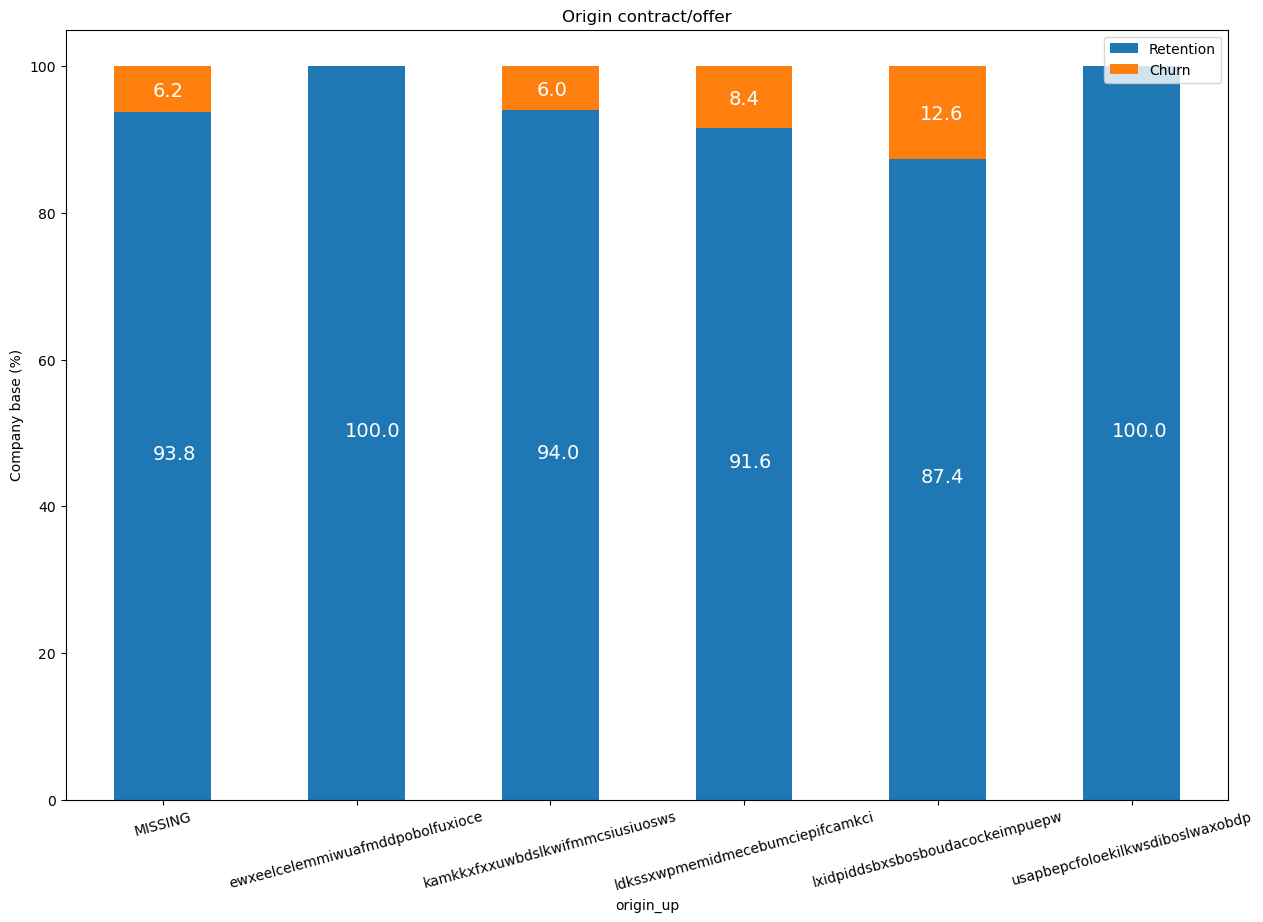

In [208]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer",rot_=15)

## Hypothesis Testing

Now, after exploring the data, its time to investigate whether price sensitivity has some influence on the churning. First we need to define price sensitivity.
Since, we have consumption data for each companies for the year 2015, we will create new features to measure price sensitivity using the average of the year, the last 6 months and the last 3 months.

In [265]:
#Transform the columns to datetime type

client_df['date_activ']=pd.to_datetime(client_df['date_activ'],format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [266]:
price_df['price_date'].describe()

C:\Users\sudee\AppData\Local\Temp\ipykernel_30232\3024386980.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  price_df['price_date'].describe()


count                  193002
unique                     12
top       2015-08-01 00:00:00
freq                    16094
first     2015-01-01 00:00:00
last      2015-12-01 00:00:00
Name: price_date, dtype: object

In [268]:
price_df.head(1)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [303]:
#Create mean average
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [304]:
mean_year.head(1)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694


In [305]:
#Combining into single dataframe

mean_year = mean_year.rename(
    index=str,
    columns={
        'price_off_peak_var':'mean_year_price_off_peak_var',
        'price_peak_var':'mean_year_price_peak_var',
        'price_mid_peak_var':'mean_year_price_mid_peak_var',
        'price_off_peak_fix':'mean_year_price_off_peak_fix',
        'price_peak_fix':'mean_year_price_peak_fix',
        'price_mid_peak_fix':'mean_year_price_mid_peak_fix'
    })

mean_6m = mean_6m.rename(
    index=str,
    columns={
        'price_off_peak_var':'mean_6m_price_off_peak_var',
        'price_peak_var':'mean_6m_price_peak_var',
        'price_mid_peak_var':'mean_6m_price_mid_peak_var',
        'price_off_peak_fix':'mean_6m_price_off_peak_fix',
        'price_peak_fix':'mean_6m_price_peak_fix',
        'price_mid_peak_fix':'mean_6m_price_mid_peak_fix'
    })


mean_3m = mean_3m.rename(
    index=str,
    columns={
        'price_off_peak_var':'mean_3m_price_off_peak_var',
        'price_peak_var':'mean_3m_price_peak_var',
        'price_mid_peak_var':'mean_3m_price_mid_peak_var',
        'price_off_peak_fix':'mean_3m_price_off_peak_fix',
        'price_peak_fix':'mean_3m_price_peak_fix',
        'price_mid_peak_fix':'mean_3m_price_mid_peak_fix'
    })

In [306]:
mean_6m.head(1)

,id,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555


In [309]:
mean_3m.head(1)

,id,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003


In [311]:
mean_year['mean_year_price_off_peak']=mean_year['mean_year_price_off_peak_var']+mean_year['mean_year_price_off_peak_fix']
mean_year['mean_year_price_peak']=mean_year['mean_year_price_peak_var']+mean_year['mean_year_price_peak_fix']
mean_year['mean_year_price_mid_peak']=mean_year['mean_year_price_mid_peak_var']+mean_year['mean_year_price_mid_peak_fix']

mean_6m['mean_6m_price_off_peak']=mean_6m['mean_6m_price_off_peak_var']+mean_6m['mean_6m_price_off_peak_fix']
mean_6m['mean_6m_price_peak']=mean_6m['mean_6m_price_peak_var']+mean_6m['mean_6m_price_peak_fix']
mean_6m['mean_6m_price_mid_peak']=mean_6m['mean_6m_price_mid_peak_var']+mean_6m['mean_6m_price_mid_peak_fix']

mean_3m['mean_3m_price_off_peak']=mean_3m['mean_3m_price_off_peak_var']+mean_3m['mean_3m_price_off_peak_fix']
mean_3m['mean_3m_price_peak']=mean_3m['mean_3m_price_peak_var']+mean_3m['mean_3m_price_peak_fix']
mean_3m['mean_3m_price_mid_peak']=mean_3m['mean_3m_price_mid_peak_var']+mean_3m['mean_3m_price_mid_peak_fix']

In [312]:
#Merge into 1 DataFrame

price_features=pd.merge(mean_year,mean_6m,on='id')
price_features=pd.merge(price_features,mean_3m,on='id')

In [313]:
price_features.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


Now, lets merge the churn data and see whether price sensitivity has any corelation with churn

In [317]:
price_analysis=pd.merge(price_features,client_df[['id','churn']], on='id')
price_analysis.head(10)

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0
5,00184e957277eeef733a7b563fdabd06,0.147637,0.000000,0.000000,44.266930,0.000000,0.000000,44.414568,0.000000,0.000000,...,0.145093,0.000000,0.000000,44.266930,0.00000,0.000000,44.412023,0.000000,0.000000,0
6,001987ed9dbdab4efa274a9c7233e1f4,0.122756,0.102290,0.073030,40.647427,24.388455,16.258972,40.770183,24.490746,16.332002,...,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555,40.847060,24.537821,16.366071,0
7,0019baf3ed1242cd99b3cb592030446f,0.267449,0.000000,0.000000,57.961930,0.000000,0.000000,58.229380,0.000000,0.000000,...,0.275124,0.000000,0.000000,59.206930,0.00000,0.000000,59.482054,0.000000,0.000000,1
8,001cb880d847a0b63b404a48e50aec17,0.145099,0.000000,0.000000,44.370635,0.000000,0.000000,44.515734,0.000000,0.000000,...,0.140172,0.000000,0.000000,44.444710,0.00000,0.000000,44.584882,0.000000,0.000000,1
9,001cd16732dc7d5bdf46b0d49996c271,0.172369,0.000000,0.000000,45.189154,0.000000,0.000000,45.361523,0.000000,0.000000,...,0.200142,0.000000,0.000000,46.444710,0.00000,0.000000,46.644852,0.000000,0.000000,0


In [319]:
price_n_churn=['mean_year_price_off_peak','mean_year_price_peak','mean_6m_price_off_peak','mean_6m_price_peak','mean_3m_price_off_peak','mean_3m_price_peak','churn']
price_analysis[price_n_churn].head(10)

,mean_year_price_off_peak,mean_year_price_peak,mean_6m_price_off_peak,mean_6m_price_peak,mean_3m_price_off_peak,mean_3m_price_peak,churn
0,40.826071,24.524832,40.850151,24.539698,40.848791,24.539003,0
1,44.531877,0.000000,44.589397,0.000000,44.588653,0.000000,0
2,45.501268,0.000000,46.146734,0.000000,46.145990,0.000000,0
3,44.414856,0.000000,44.413114,0.000000,44.412370,0.000000,0
4,40.854961,24.542872,40.851892,24.541438,40.850532,24.540743,0
5,44.414568,0.000000,44.412767,0.000000,44.412023,0.000000,0
6,40.770183,24.490746,40.848420,24.538516,40.847060,24.537821,0
7,58.229380,0.000000,59.482798,0.000000,59.482054,0.000000,1
8,44.515734,0.000000,44.585626,0.000000,44.584882,0.000000,1
9,45.361523,0.000000,46.303670,0.000000,46.644852,0.000000,0


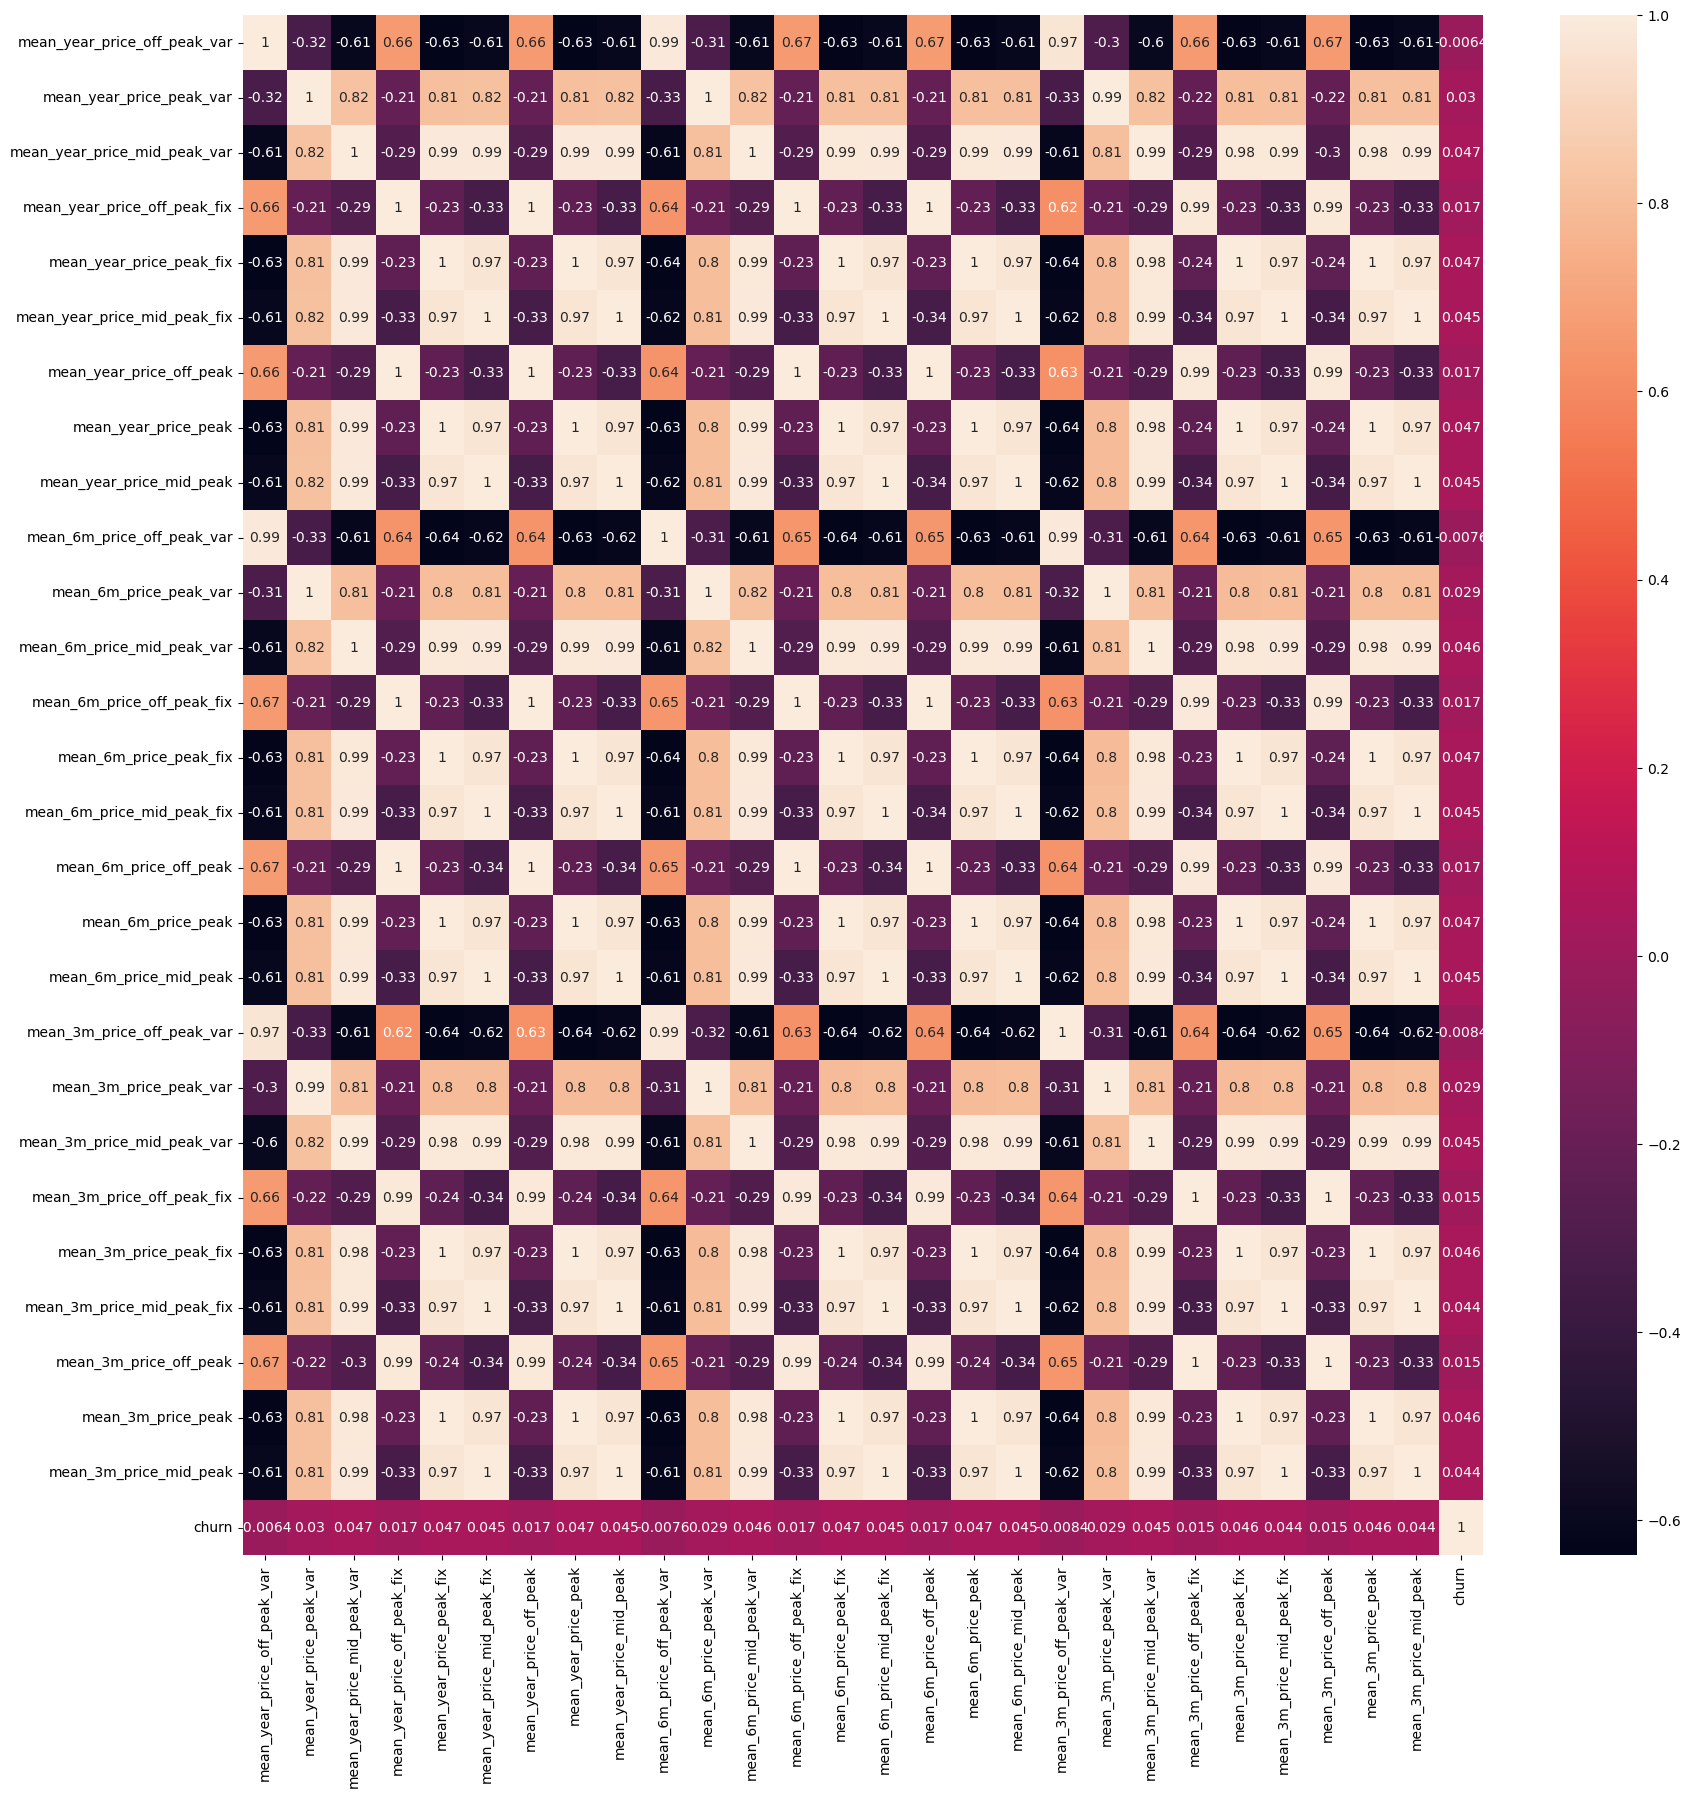

In [324]:
corr=price_analysis.corr()

#Ploting Correlation

plt.figure(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True,annot_kws={'size':10})

#Axis tick size

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

This corelation plot shows higher magnitude of corelation between other price sensitivity variables, however overall the corelation
with churn is very low. This indicates that there is a weak linear relationship between price sensitivity and churn. This suggests that for 
price sensitivity ti be a major driver for pretending churn, we may need to engineer the feature differently.

In [326]:
merged_data=pd.merge(client_df.drop(columns=['churn']),price_analysis, on ='id')
merged_data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


In [327]:
merged_data.to_csv('clean_data_after_eda.csv')